# This lab plays with linear transformation. We will deal with transition matrix, and manipulating images with matrices.

Here we try tiling the plane with a bird image(From _When life is linear_ by Tim Chartier)

In [3]:
# import packages 
import numpy as np
from scipy.sparse import diags
import matplotlib.pyplot as plt
import matplotlib.patches
from PIL import Image


In [ ]:
# make a basic bird polygon. Run the code to plot the bird

fig = plt.figure()
points = [[0.3036, 0.1960], [0.6168, 0.2977], [0.7128, 0.4169], [0.7120, 0.1960],[0.9377,0.2620],\
          [0.7120,0.5680],[0.3989,0.6697],[0.3028,0.7889],[0.3036,0.5680],[0.5293,0.5020]]

bird = matplotlib.patches.Polygon(points, facecolor='blue')

fig, ax = plt.subplots()
ax.set_aspect("equal")
ax.add_patch(bird)

ax.set_xlim(0.2,1)
ax.set_ylim(0.2,0.9)
plt.show()

## Manipulating the figure (reflection, translation,and rotation) is done thru matrix multiplication.

Multiplying a vectot with $M = \begin{pmatrix}\cos\theta& -\sin\theta\\ \sin\theta& \cos\theta\end{pmatrix}$ gives rotation by angle $\theta$

In [68]:
# rotate bird 180 degrees about the origin, first define rotation matrix  

theta = np.pi
rotationMatrix = np.array([[np.cos(theta),-np.sin(theta)],[np.sin(theta),np.cos(theta)]])
    
#rotationMatrix

Consider a vector $\mathbf{v}\in\mathbb{R}^2$, then $M\mathbf{v}$ is the vector $\mathbf{v}$ rotated by $\theta$. As previously defined, we take $\theta=\pi$

In [69]:
# rotate all points in original bird about the origin 
rotatepoints = []
for x in points:
    rotatepoints.append(np.dot(rotationMatrix,x))

In [ ]:
# Plot rotated bird. Run the code to plot the bird

fig = plt.figure()

rotatebird = matplotlib.patches.Polygon(rotatepoints, facecolor='yellow')

fig, ax = plt.subplots()
ax.set_aspect("equal")
ax.add_patch(rotatebird)

ax.set_xlim(-1,-0.2)
ax.set_ylim(-0.9,-0.2)
plt.show()

In [71]:
# Modify your code from above cells, rotate the bird 90 degrees, then plot it.

Given a vector $\mathbf{v}$, if we add the vector by $\mathbf{ u}$, then the result vector $\mathbf{u+v}$ is moved up by $u_1$, and to the right by $u_2$. 

In [72]:
# define shift vector

shift = (2*0.7120, 2*0.4320)


In [73]:
# shift rotated bird up via matrix addition. Uncomment to show shifted points by addition
shiftpoints = []
for x in rotatepoints:
    shiftpoints.append(x+shift)
#shiftpoints  

In [ ]:
# Plot shifted bird. Run the code to plot the bird

fig = plt.figure()

shiftbird = matplotlib.patches.Polygon(shiftpoints, facecolor='pink')


fig, ax = plt.subplots()
ax.set_aspect("equal")
ax.add_patch(shiftbird)

ax.set_xlim(0.2,1.5)
ax.set_ylim(0.0,0.9)
plt.show()

In [ ]:
# Shift the bird by a quantity you choose. You might need to adjust the axes to make sure the bird is within range. 


## Now we will achieve the effect of rotating the bird 180 degrees about the point (0.7120, 0.4320)

In general, you can think about the process as translating the point (a,b) to the origin, rotating by $\theta$, then translating from the origin back to (a,b).

This is done via the following matrix multiplication: 
$\begin{pmatrix}1&0&a\\0&1&b\\0&0&1\end{pmatrix}\begin{pmatrix}\cos\theta&-sin\theta&0\\ \sin\theta&\cos\theta&0\\0&0&1\end{pmatrix}\begin{pmatrix}1&0&-a\\0&1&-b\\0&0&1\end{pmatrix}$

Notice, the order of operation is matrix multiplied on the right is the first operation that applies to your vector. Matrix multiplication gives the following product: 

$\begin{pmatrix}\cos\theta&-sin\theta&-a\cos\theta+b\sin\theta+a\\ \sin\theta&\cos\theta&-a\sin\theta-b\cos\theta+b\\0&0&1\end{pmatrix}$

We will then define the array in Numpy and give the point (a,b) and the rotation angle.

Note: here we artificially make the vector three dimensional to pack both rotation and shift in matrix multiplication. After we are done, we throw away the added third component. 

In [ ]:
# Define above array. Uncomment to show matrix

theta = np.pi
a = 0.7120
b = 0.4320
shiftrotateMatrix = np.array([[np.cos(theta),-np.sin(theta),-a*np.cos(theta)+b*np.sin(theta)+a],\
                              [np.cos(theta),-np.sin(theta),-a*np.sin(theta)-b*np.cos(theta)+b],\
                              [0,0,1]])
#shiftrotateMatrix

In [ ]:
# notice the array is 3 by 3, so we will extend the points (x,y) to (x,y,1). Uncomment to see the new list of points3d
points3d = points
for x in points3d:
    x.append(1)
    

#print(points3d) 


In [ ]:
# rotate bird about the point (0.7120,0.4320)
pointsab = []
for x in points3d:
    pointsab.append(np.dot(shiftrotateMatrix,x))

#pointsab    

In [81]:
# convert the list to 2D array. Uncomment to show finalpoints

finalpoints = [np.array([x[0],x[1]]) for x in pointsab]

#print(finalpoints)

<Figure size 432x288 with 0 Axes>

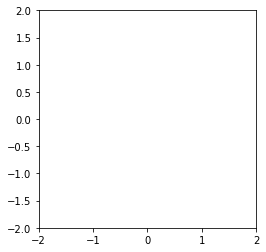

In [88]:
# plot final bird rotated about point (a,b). Something wrong with finalpoints when plotting, figure showed when doing 
# shiftpoints and points, but not rotatepoints and finalpoints.

fig = plt.figure()

finalbird = matplotlib.patches.Polygon(finalpoints, facecolor='yellow')


fig, ax = plt.subplots()
ax.set_aspect("equal")
ax.add_patch(finalbird)

ax.set_xlim(-2,2)
ax.set_ylim(-2,2)
plt.show()

In [76]:
# type(shiftpoints), type(shiftpoints[0]), shiftpoints # change to points and rotatepoints

In [77]:
# type(finalpoints),type(finalpoints[0]),finalpoints

In [79]:
# The above is my attempts for trouble-shooting, but could not make figure show up. 
# Extra credit if you can fix it: 2 points on midterm exam.

### Given $n$ vectors $\mathbf{a}_1,...,\mathbf{a}_n$ in a $n$ dimensional space, we check if the vectors are linearly dependent/independent, by considering the linear system $A\mathbf{c}=\mathbf{0}$.

In [10]:
# generate n random vectors and store in a n by n matrix. Print a submatrix of the matrix by uncommenting the 
# print command and specifying which portion to print.

n = 50

m = n

A = np.random.randint(max,size=(n,m))

# print(A)

In [11]:
# Print the first and last column of matrix A. Write a short code to check if they are linearly dependent. 

In [ ]:
# Write a short code to check if the columns of A are linearly dependent. Feel free to check the dimension of matrix. 
# The problem is set up for square matrix, what do you need to do if the matrix is rectangular? 